## EXPLORATORY DATA ANALYSIS ON HOTEL BOOKING 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

C:\Users\srirk\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\srirk\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\srirk\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df = pd.read_csv("C:/Users/srirk/Downloads/Hotel Bookings.csv")

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
# Finding the number of rows and columns
df.shape

(119390, 32)

In [9]:
# Findings the unique values of columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### Description

In [10]:
df.tail

<bound method NDFrame.tail of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [12]:
# Finding the information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
# Copying the data set
df1 = df.copy()

## Cleaning data
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: 

1.Remove duplicate rows 

2.Handling missing values.

3.Convert columns to appropriate datatypes.

4.Adding important columns

5.Remove outliers

### Removing duplicate rows

In [14]:
df1[df1.duplicated()].shape

(31994, 32)

In [15]:
# Dropping duplicate values
df1.drop_duplicates(inplace = True)

In [16]:
df1.shape

(87396, 32)

### Handling missing values.

In [17]:
df1.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns.
We will replace null values by 0 in these columns

In [18]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [19]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.
So, 'nan' values are the missing values due to error of recording data.

We will replace the null values under this column with mean value of children.

In [20]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

Next column with missing value is 'country'. This column represents the country of oriigin of customer.
Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [21]:
df1.country.fillna(df.country.mode()[0],inplace=True)

In [22]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

There are no null values in any column

In [23]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 32)

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [24]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

### Converting columns to appropriate datatypes.

In [25]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [26]:
# changing datatype of column 'reservation_status_date' to data_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

### Adding important columns.

In [27]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

#Adding total children as column 
df1['total_children'] = df1['children']+df1['babies']

#Adding money per person as column
df1['money_per_person'] = (df1['adr']*df1['total_stay'])//(df1['total_people'])
#Adding adr per person as column

df1['adr_pp'] = (df1['adr'])//(df1['total_people'])

We are adding this column so that we can analyse the stay length at hotels and we can analyse the money per person.

In [28]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,total_children,money_per_person,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,0,2,0,0.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,0,2,0,0.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,1,1,0,75.0,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,1,1,0,75.0,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,2,2,0,98.0,49.0


### Removing outliers

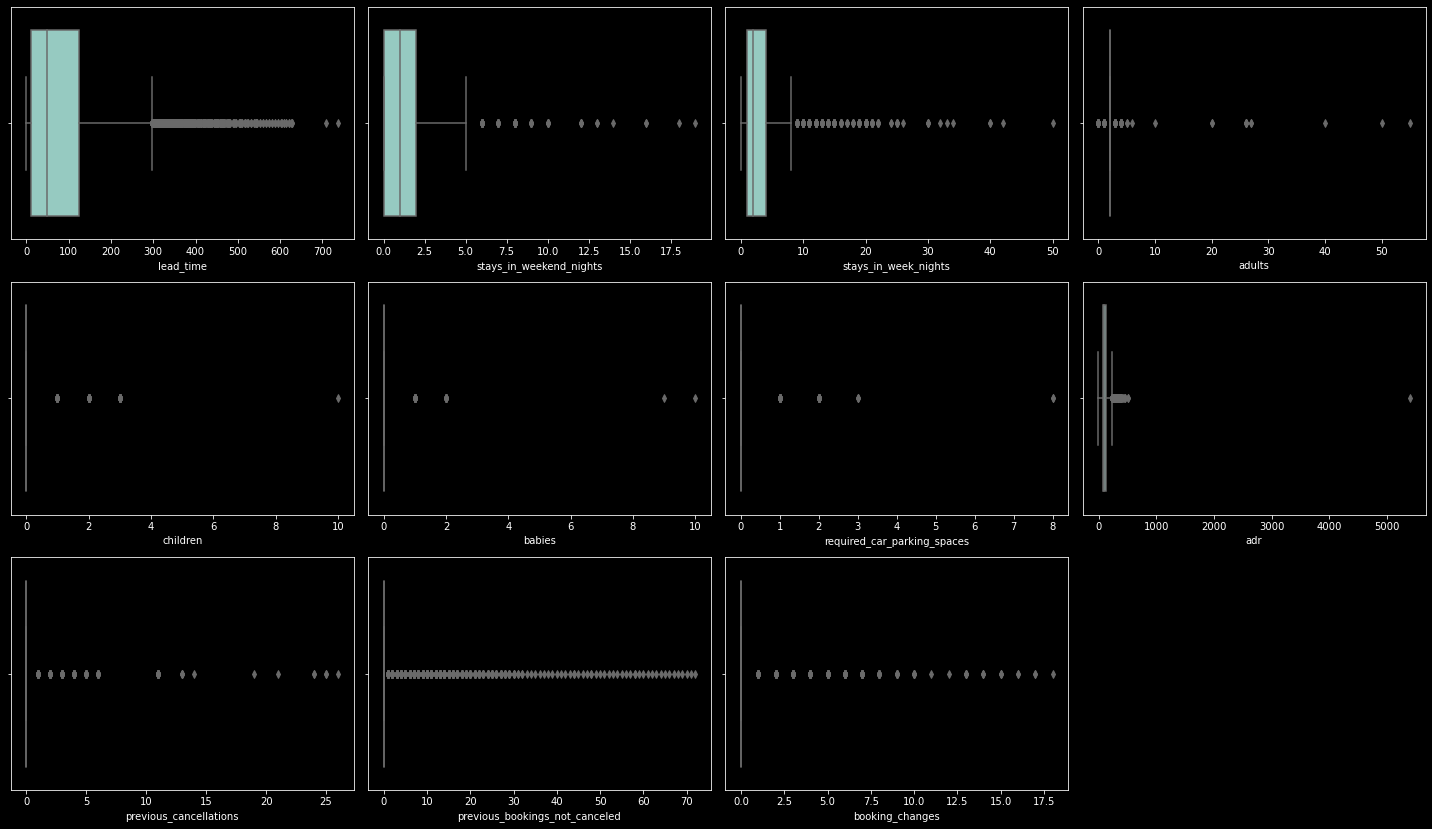

In [29]:
# Finding the whether it has outliers or not
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.style.use('dark_background')
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df1[column])
  plt.tight_layout()

In [30]:
df1.loc[df1.lead_time > 350, 'lead_time'] = 350
df1.loc[df1.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df1.loc[df1.adults > 4, 'adults'] = 4
df1.loc[df1.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df1.loc[df1.previous_cancellations > 0, 'previous_cancellations'] = 1
df1.loc[df1.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df1.loc[df1.booking_changes > 5, 'booking_changes'] = 5
df1.loc[df1.babies > 8, 'babies'] = 0
df1.loc[df1.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df1.loc[df1.children > 8, 'children'] = 0
df1.loc[df1.adr > 1000, 'adr'] = 1000

Removed all the outliers 

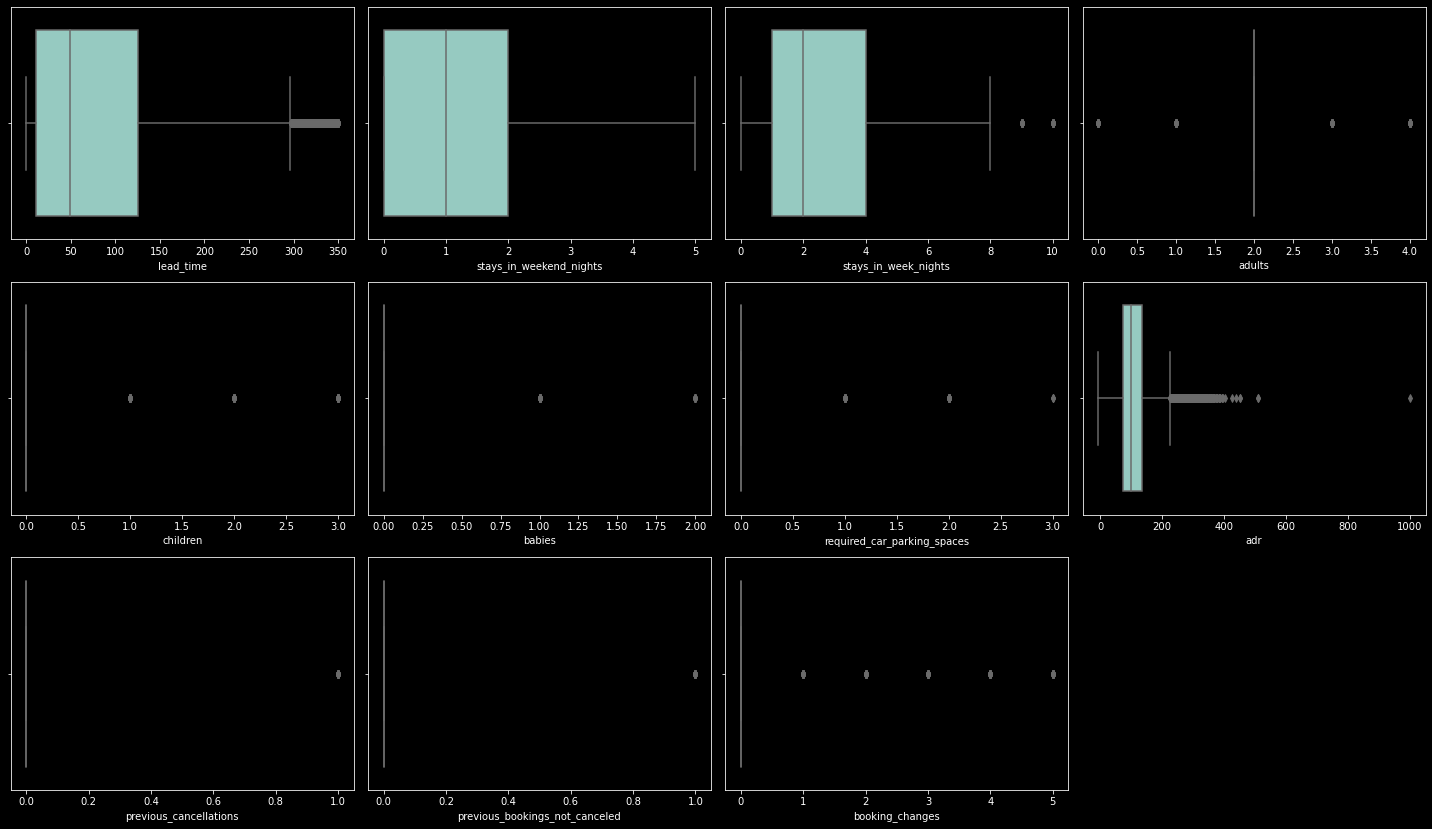

In [31]:
#Columns after removing the outliers
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df1[column])
  plt.tight_layout()

# UNI-VARIATE ANALYSIS

## Number of bookings for different hotels

<AxesSubplot:xlabel='hotel', ylabel='count'>

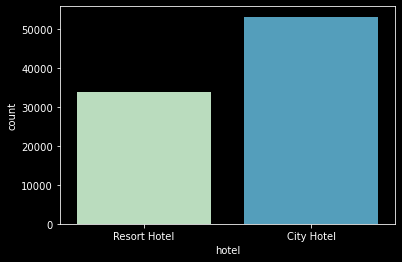

In [32]:
plt.style.use('dark_background')
sns.countplot(x='hotel', data=df1, palette = 'GnBu')

##### Analysis
WE can conclude that the most number of bookings is for city hotel rather than resort hotel.
The people showm most imterest towards booking the city hotel.

Based on the interest shown by people we can conclude that the people who booked the hotel are either came to visit the popular destinations rather than natural places

## Number of hotels cancelled

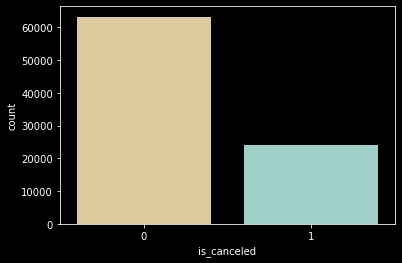

In [33]:
plt.figure(figsize=(6,4))
#Canceled=1, Not canceled= 0
sns.countplot(df1['is_canceled'], palette='BrBG')
plt.show()

## Number of hotels cancelled vs Not cancelled

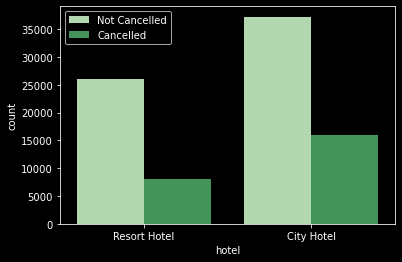

In [34]:
plt.style.use('dark_background')
sns.countplot(x='hotel', hue='is_canceled', data=df1, palette = 'Greens')
plt.legend(['Not Cancelled', 'Cancelled'])

##### Analysis:
Comparing between resort and city hotel the most percentage of hotels cancelled is from city hotel(~40%) and nearly 26% cancelled for resort hotelA

## Booking of Hotels in Various Months

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

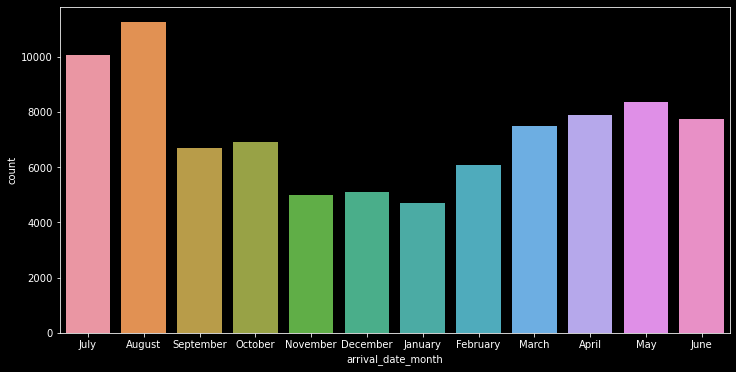

In [35]:
plt.figure(figsize=(12,6))
plt.style.use('dark_background')
sns.countplot(x='arrival_date_month', data=df1)

##### Analysis
Most of the bookings are done in the Month of August 

## Booking of Hotels in various years 

In [36]:
# Unique years
df1['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

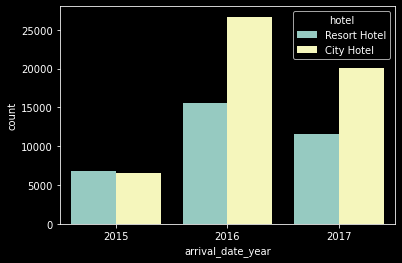

In [37]:
plt.style.use('dark_background')
sns.countplot(x='arrival_date_year', hue = "hotel", data=df1)

##### Analysis:
Comparing between the bookings in various years the most number of hotels booked in the year 2016 followed by 2017 and least hotels booked in the year 2015

In [38]:
df1['country'].value_counts()

country
PRT    27802
GBR    10424
FRA     8823
ESP     7244
DEU     5385
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

### Top 10 countries who booked hotel

In [39]:
df1['country'].value_counts().head(10)

country
PRT    27802
GBR    10424
FRA     8823
ESP     7244
DEU     5385
ITA     3061
IRL     3015
BEL     2081
BRA     1993
NLD     1910
Name: count, dtype: int64

In [40]:
top10 = df1[df1['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL",
                         "BEL","BRA","NLD"])]

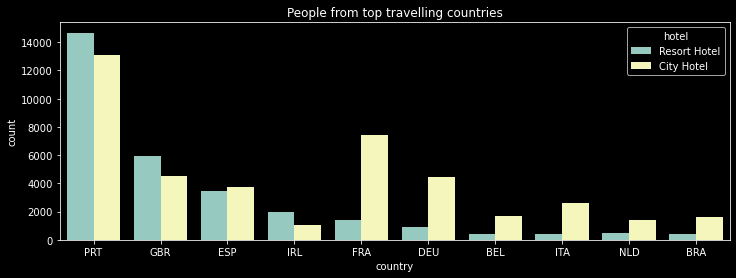

In [41]:
plt.figure(figsize=(12,4))
sns.countplot(x='country', hue = "hotel",data= top10)
plt.title('People from top travelling countries')
plt.show()

##### Analysis
The most number of bookings is with the country name of "PRT"

## Booking of hotel in various months

In [42]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

Text(0.5, 1.0, 'Bookings by months')

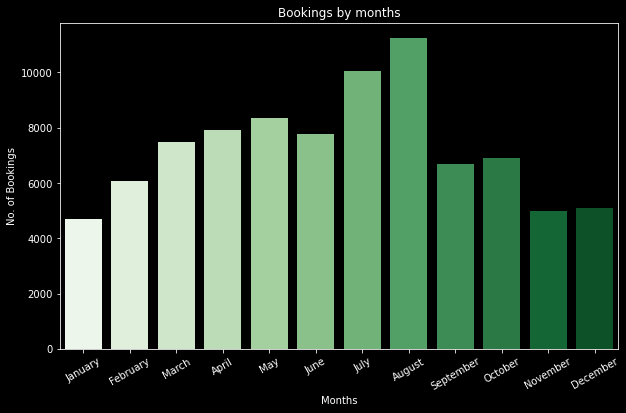

In [43]:
d = df1.groupby("arrival_date_month")["arrival_date_month"].count()
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.barplot(x=d.index, y=d, order=months,palette = 'Greens')
p = plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("No. of Bookings")
plt.title("Bookings by months")


##### Analysis:
Comparing the bookings in various months the most number of bookings are done in the August followed by july and least number of bookings are done in january

### Stay length for booking

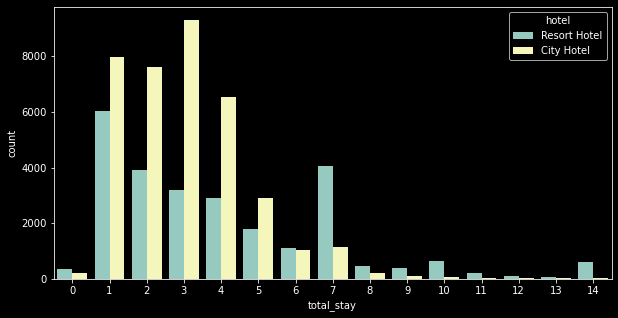

In [44]:
not_canceled = df1[df1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

<AxesSubplot:xlabel='assigned_room_type', ylabel='count'>

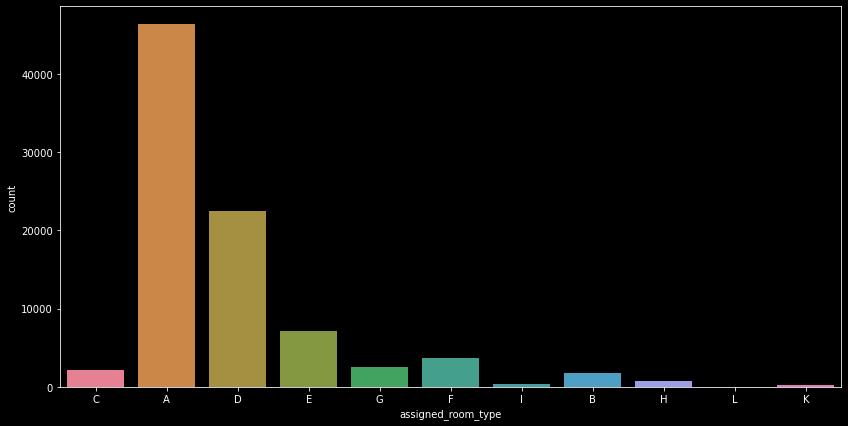

In [45]:
plt.figure(figsize=(14,7))
sns.countplot(df1['assigned_room_type'], palette='husl')

##### Analysis
The most number of bookings are made for room A 

# Market_segments

From the channel mode hotels were booked.

In [46]:
df1.market_segment.value_counts()

market_segment
Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: count, dtype: int64

TA - Travel agent,
TO - Tour operator

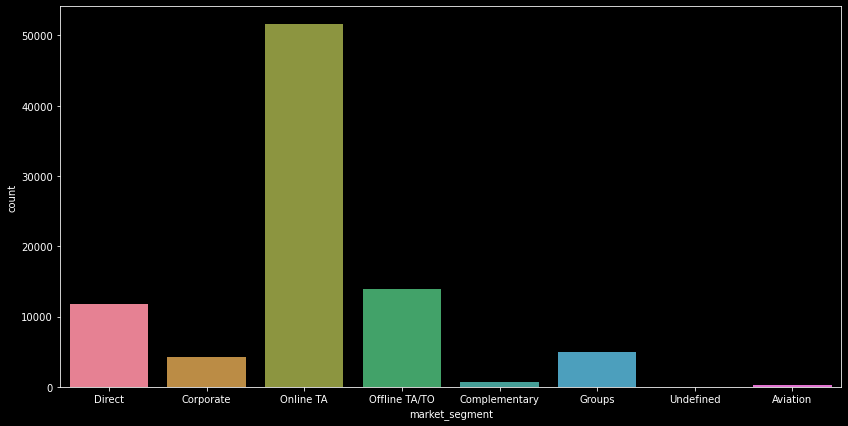

In [47]:
plt.figure(figsize=(14,7))
sns.countplot(df1['market_segment'], palette='husl')
plt.show()

The most number of bookings are done through online TA and next by Offline TA/TO

## Prefered meal by most people

Undefined/SC — no meal package

BB — Bed & Breakfast

HB — Half board (breakfast and one other meal — usually dinner)

FB — Full board (breakfast, lunch and dinner)

In [48]:
df1.meal.value_counts()

meal
BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: count, dtype: int64

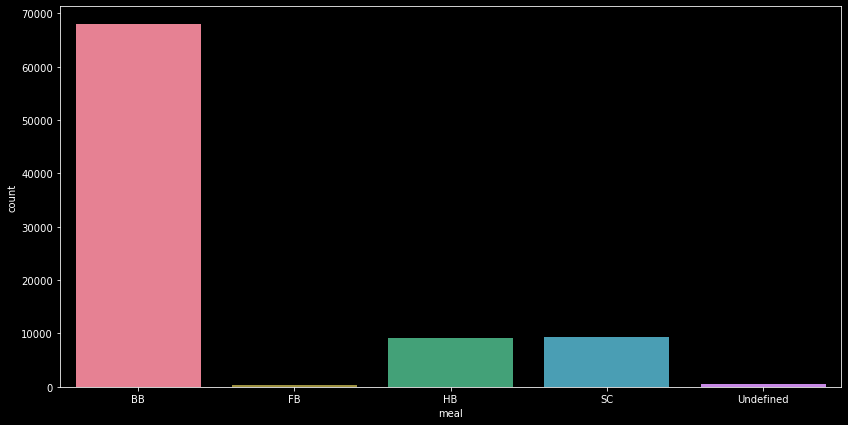

In [49]:
plt.figure(figsize=(14,7))
sns.countplot(df1['meal'], palette='husl')
plt.show()

The most preferred type is BB and least preferred is FB

## Booked customer type

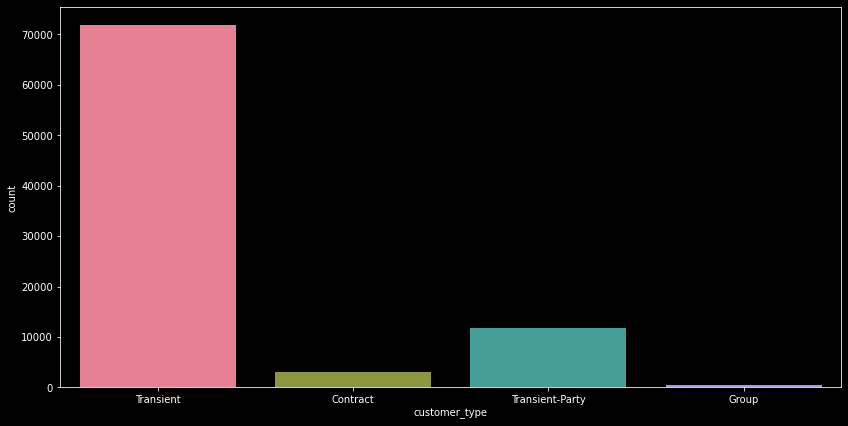

In [50]:
plt.figure(figsize=(14,7))
sns.countplot(df1['customer_type'], palette='husl')
plt.show()

The most booked customer type is Transient

### Agent with more number of bookings

In [51]:
d1 = pd.DataFrame(df1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

KeyError: 'agent'

## Reservation Status Type

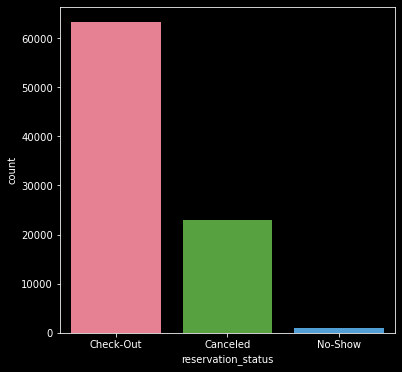

In [52]:
plt.figure(figsize=(6,6))
sns.countplot(df1['reservation_status'], palette='husl')
plt.show()

## Total number of people for booking

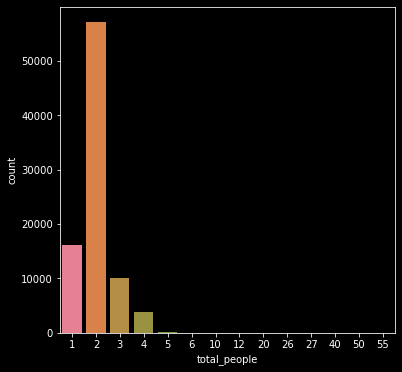

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(df1['total_people'], palette='husl')
plt.show()

Mostly group of 2 people are booking for hotel

In [59]:
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [60]:
guest_city = df1[df1['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

,Country,No of guests
0,PRT,17991
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [62]:
basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

## Bi-Variate Analysis

## Average daily rate (ADR) for different type of hotels 

In [63]:
df1['adr'].describe()

count    87230.000000
mean       106.467589
std         51.970778
min         -6.380000
25%         72.250000
50%         98.200000
75%        134.100000
max       1000.000000
Name: adr, dtype: float64

Text(0.5, 1.0, 'Daily Rate by hotel type')

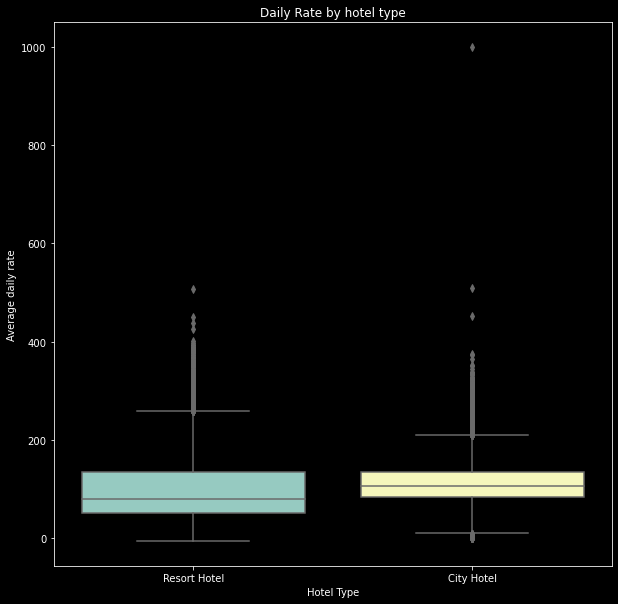

In [64]:
plt.figure(figsize=(10,10))
sns.boxplot(x='hotel', y='adr', data = df1)
plt.ylabel('Average daily rate')
plt.xlabel("Hotel Type")
plt.title("Daily Rate by hotel type")

# Adr value on total number of stays

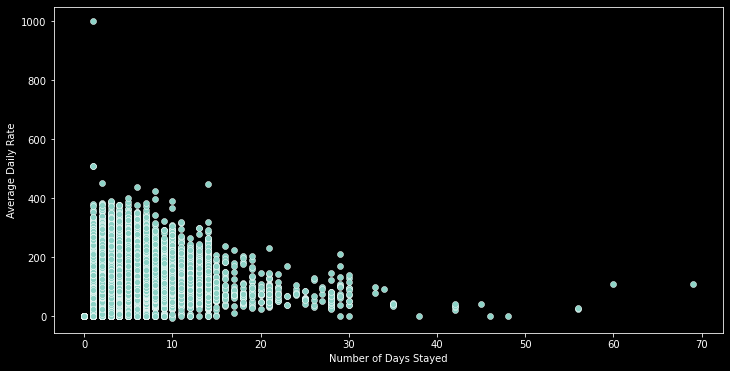

In [65]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.xlabel("Number of Days Stayed")
plt.ylabel("Average Daily Rate")
plt.show()


# Adr for each month

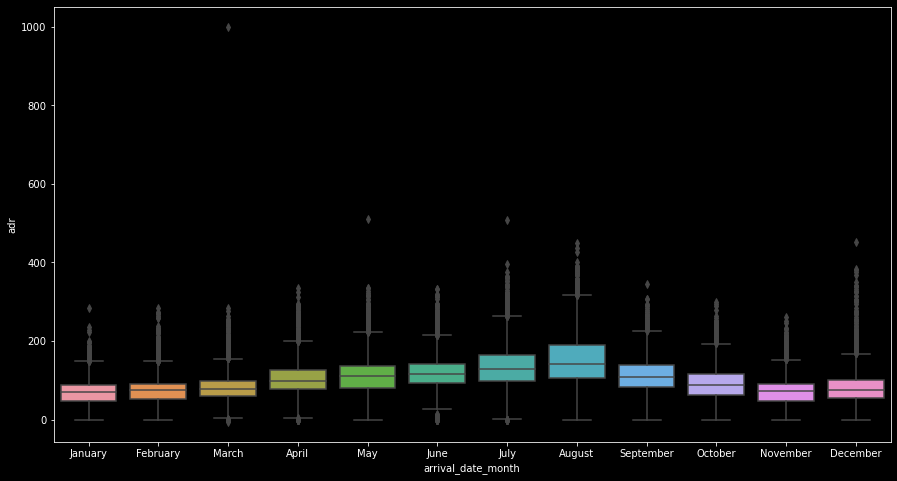

In [66]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df1['arrival_date_month'],y = df1['adr'])
plt.show()

### Room type that collects more adr 

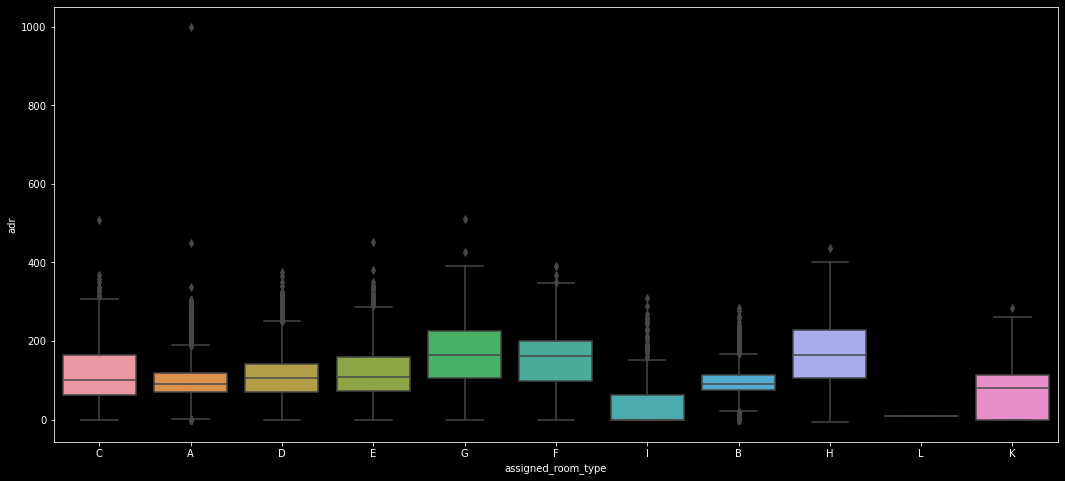

In [67]:
plt.figure(figsize=(18, 8))

grp_by_room = df1.groupby('assigned_room_type')
df1['Num_of_bookings'] = grp_by_room.size()
sns.boxplot(x = df1['assigned_room_type'], y = df1['adr'])
plt.show()

The better adr type rooms is H and G 

Text(0.5, 1.0, 'Average number of special requests by customer type')

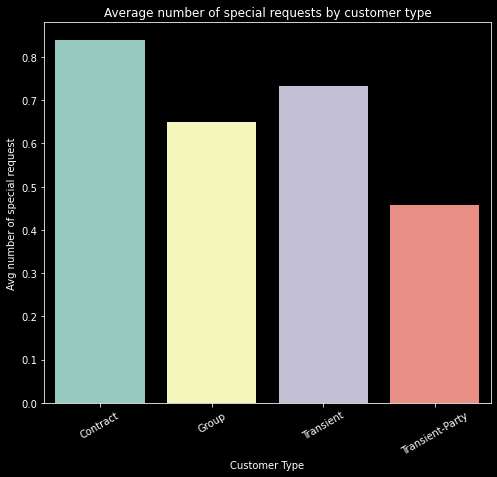

In [68]:
d = df1.groupby("customer_type")['total_of_special_requests'].mean()
plt.figure(figsize=(8,7))
sns.barplot(x=d.index, y=d)
p = plt.xticks(rotation=30)
plt.xlabel("Customer Type")
plt.ylabel("Avg number of special request")
plt.title("Average number of special requests by customer type")

Text(0.5, 1.0, 'Avg Special Requests made pre guest across months in a year')

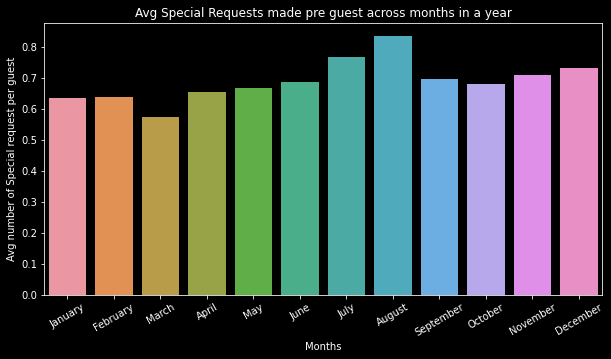

In [69]:
d = df1.groupby('arrival_date_month')['total_of_special_requests'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=d.index, y=d, order=months)
p = plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("Avg number of Special request per guest")
plt.title("Avg Special Requests made pre guest across months in a year")    

# Multi-variate Analysis

In [70]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


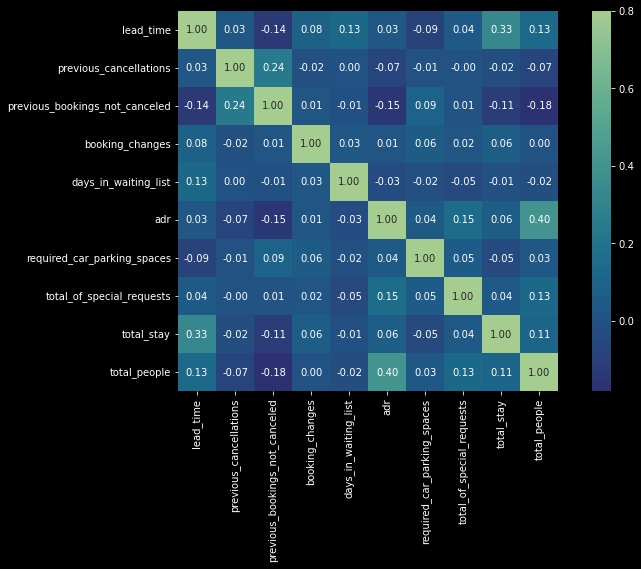

In [71]:
#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,cmap='crest_r',annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);


##### Analysis
Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

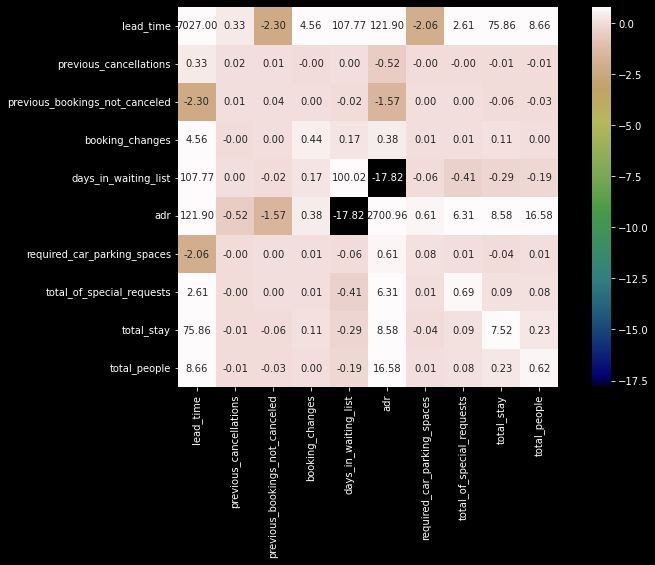

In [72]:
#covariance matrix
covmat = num_df1.cov()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(covmat,cmap='gist_earth',annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

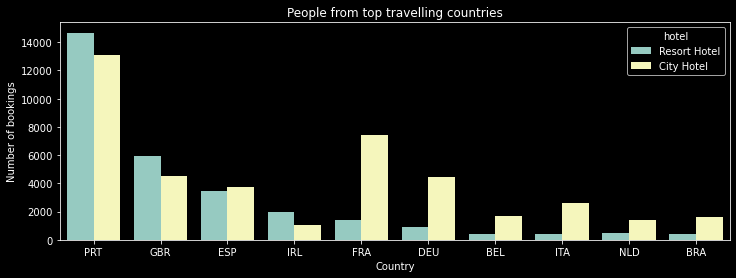

In [73]:
plt.figure(figsize=(12,4))
sns.countplot(x='country', hue = 'hotel', data= top10)
plt.title('People from top travelling countries')
plt.ylabel('Number of bookings')
plt.xlabel("Country")
plt.show()

##### Analysis
The maximum number of bookings are done from **portugal** country. 

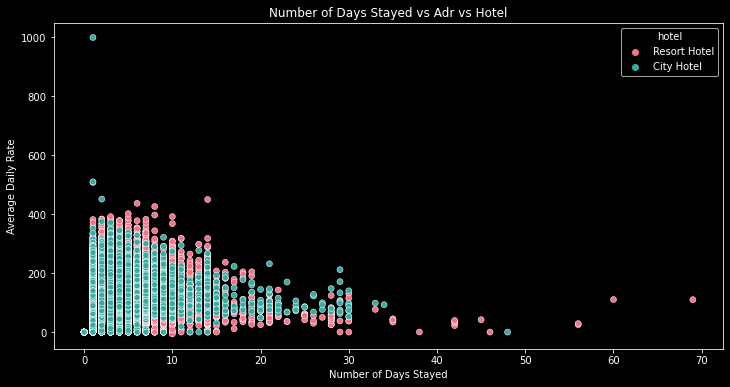

In [74]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay',hue = 'hotel',palette='husl', data = df1)
plt.title("Number of Days Stayed vs Adr vs Hotel")
plt.xlabel("Number of Days Stayed")
plt.ylabel("Average Daily Rate")
plt.show()


##### Analysis
The most number of days stayed is in the **Resort hotel(~70 days)**.

Mostly the maximum average daily rate recorded is for **City hotel(~1000)**.


In [78]:
d = df1.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
d['arrival_date_month'] = pd.Categorical(d['arrival_date_month'], categories=months, ordered=True)
d.sort_values('arrival_date_month', inplace=True)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

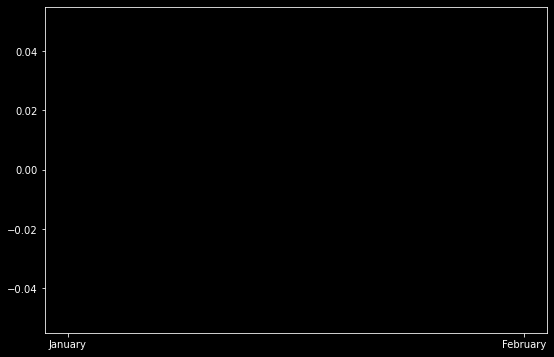

In [87]:
plt.figure(figsize=(9,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', palette='husl',data=d)
plt.ylabel("Average daily price")
plt.xlabel("Months")
p = plt.xticks(rotation=30)
plt.title("Average Daily rate by months")

##### Analysis
The maximum average daily rate for city hotel is in the month of **May**.

The maximum average daily rate for resort hotel is in the month of **August**.

Text(0.5, 1.0, 'Hotel Preference by customer type')

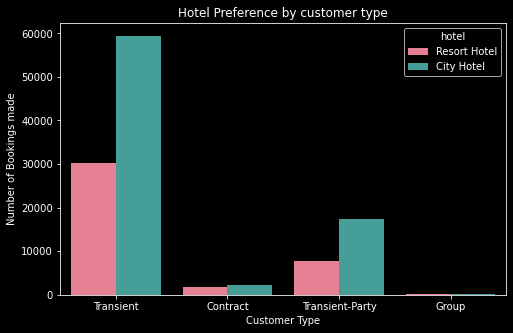

In [80]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer_type', hue='hotel', palette='husl',data=df)
plt.xlabel("Customer Type")
plt.ylabel("Number of Bookings made")
plt.title("Hotel Preference by customer type")

##### Analysis
The maximum number of bookings made by the customer type is **Transient**.

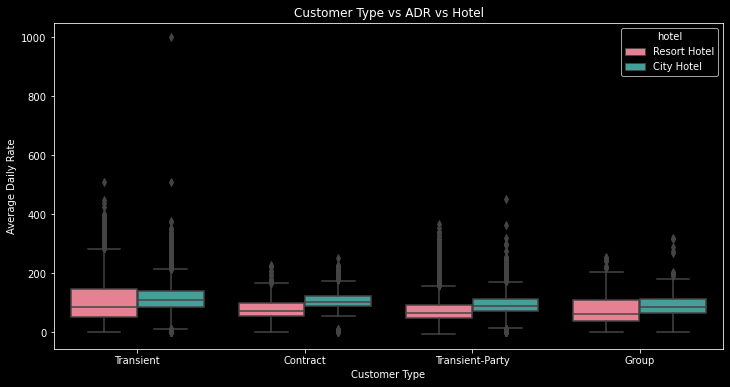

In [81]:
plt.figure(figsize = (12,6))
sns.boxplot(y = 'adr', x = 'customer_type',hue = 'hotel',palette='husl', data = df1)
plt.xlabel("Customer Type")
plt.ylabel("Average Daily Rate")
plt.title("Customer Type vs ADR vs Hotel")
plt.show()

##### Analysis
The average daily rate is more for **Transient** Customer Type

Text(0.5, 1.0, 'Week night stay bookings by market segment')

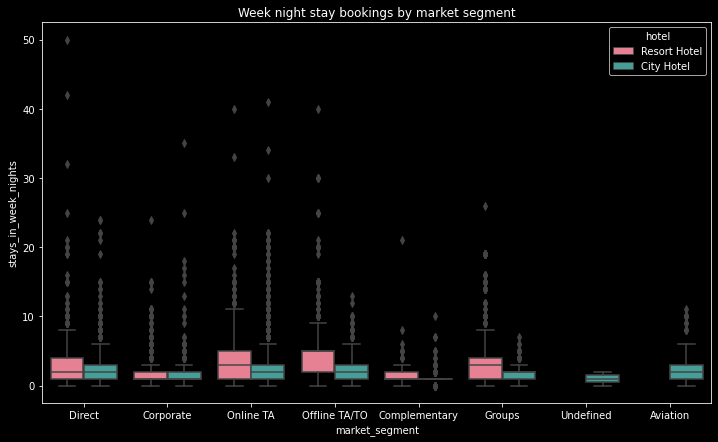

In [82]:
plt.figure(figsize = (12,7))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", hue = "hotel", palette = 'husl',data = df)
plt.title("Week night stay bookings by market segment")

##### Analysis
The most number of bookings for week nights are made by the market segment of **Online TA**

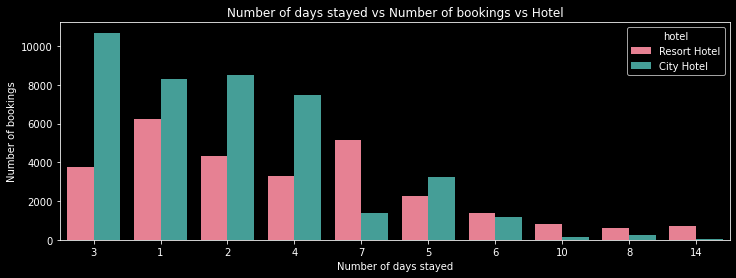

In [83]:
plt.figure(figsize=(12,4))
sns.countplot(x='total_stay', hue = 'hotel',order = df1.total_stay.value_counts().iloc[:10].index,palette= 'husl', data= top10)
plt.title('Number of days stayed vs Number of bookings vs Hotel')
plt.ylabel('Number of bookings')
plt.xlabel("Number of days stayed")
plt.show()

##### Analysis
The people are staying for **three** days mostly in the stay 

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

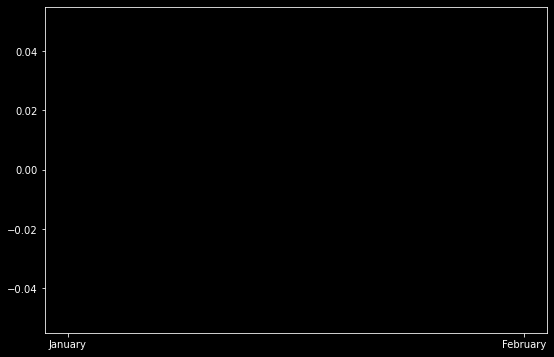

In [84]:
plt.figure(figsize=(9,6))
sns.lineplot(x='arrival_date_month', y='money_per_person', hue='hotel', palette='husl',data=df1)
plt.ylabel("Money Per Person")
plt.xlabel("Months")
plt.title("Money per person vs months vs Hotel")
p = plt.xticks(rotation=30)


##### Analysis
In city hotel the cost of room is maximum in the month of **May**

In Resort hotel the cost of room is maximum in the month of **August**

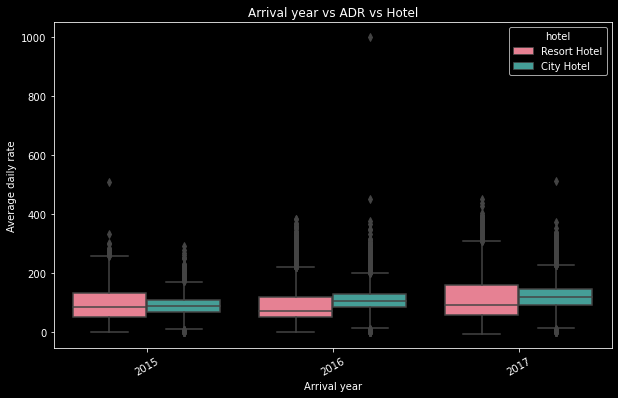

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(x='arrival_date_year', y='adr', hue='hotel', palette='husl',data=df1)
plt.ylabel("Average daily rate")
plt.xlabel("Arrival year")
plt.title("Arrival year vs ADR vs Hotel")
p = plt.xticks(rotation=30)

##### Analysis
The maximum average daily rate is collected in the year **2017**

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

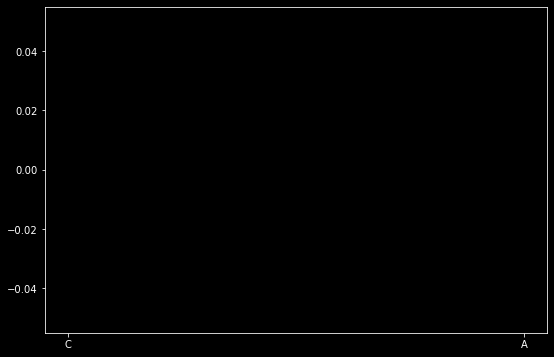

In [86]:
plt.figure(figsize=(9,6))
sns.lineplot(x='assigned_room_type', y='adr', hue='hotel', palette='husl',data=df1)
plt.ylabel("Average daily rate")
plt.xlabel("Room Type")
plt.title("Room Type vs ADR vs Hotel")
p = plt.xticks(rotation=30)

##### Analysis
The ADR of Room **G** is more in City hotel

The ADR of Room **H** is more in Resort hotel

## Conclusion

* Around 60% bookings are for City hotel and 40% bookings are for Resort hotel, therefore City Hotel is busier than Resort hotel. Also the overall adr of City hotel is slightly higher than Resort hotel.

* Most preferred meal type Bread and Breakfast

* Agent no. 9 has made most no. of bookings.

* One out of every three bookings are cancelled.

* Most demanded room type is A, but better adr generating rooms H, G and C. Hotels should increase the no. of room types A and H to maximise revenue.

* People prefer to tour more in August.

* July- August are the most busier and profitable months for both of hotels. 

* Guests use different channels for making bookings out of which most preferred way is TA/TO.

* While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.
* TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

* People do not want to pre-deposit the money for booking. 

* Online 10% of people require parking space

* Most of the visitors are couples(bookings have two adults).

* Resort hotel is preferred mostly for longer stay, day time stays and when the parking space is needed.

* Generally people prefer City hotel for short stay

* City hotel has slightly higher median lead time. Also median lead time is significantly higher for both hotels, this means customers generally plan their hotel   visits way early.

* More than 15 days advance bookings have high chances of cancellation.

* Not getting same room as reserved, longer lead time and waiting time do not affect cancellation of bookings.

* Direct bookings have very less cancellation percentage.

* Best time to book a hotel is in January

* Average days in advance booking: 77 days.

* Most common stay length is less than 4 days 

* Most visitors are from these countries : Portugal, Britain, France, Spain and Germany.

* Total Special requests and the revenue depends more on total members arrived.